In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [20]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [21]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [22]:
df=df.drop(['_c39'],axis=1)

In [23]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


Here we have data set of all policy details for like premium, tensure, claims, car, car year and fraud claim or not etc detils we have.

<AxesSubplot:xlabel='auto_make', ylabel='vehicle_claim'>

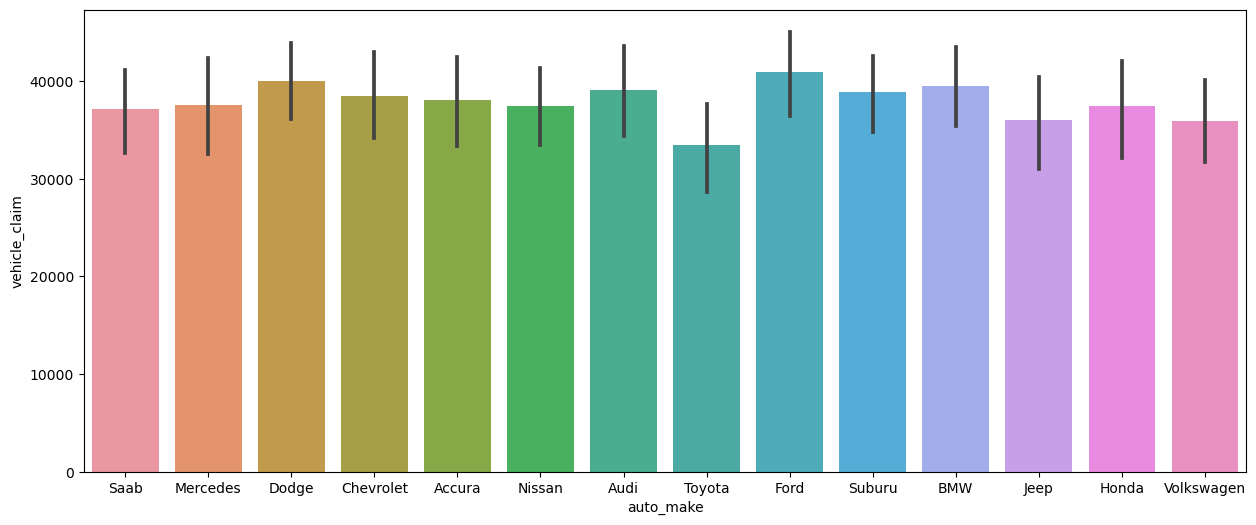

In [24]:
plt.figure(figsize=(15, 6))
sns.barplot(df['auto_make'],df['vehicle_claim'])

we can highest no of policy holder car make is ford and lowest no car make is toyota.

<AxesSubplot:xlabel='auto_make', ylabel='policy_annual_premium'>

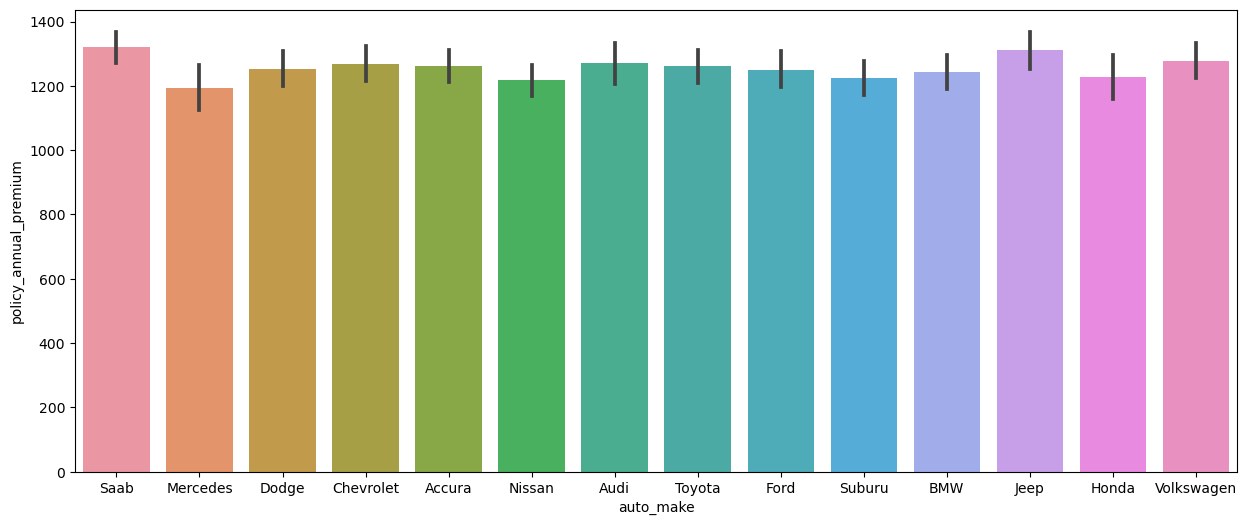

In [25]:
plt.figure(figsize=(15, 6))
sns.barplot(df['auto_make'],df['policy_annual_premium'])

almost all policy holder annual premium is around 12000 for all car make as well.

<AxesSubplot:xlabel='auto_make', ylabel='months_as_customer'>

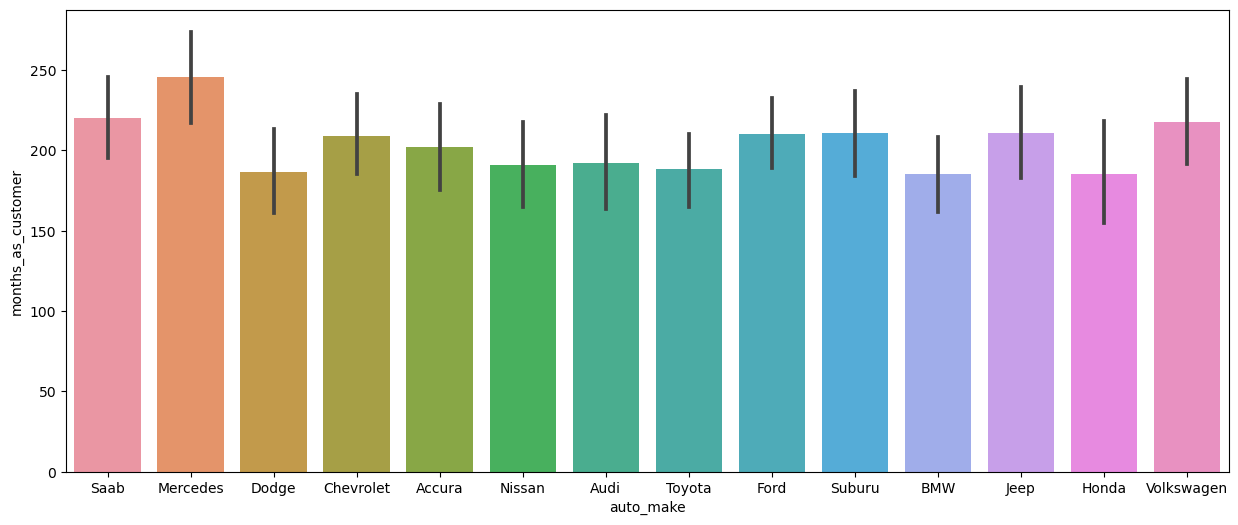

In [26]:
plt.figure(figsize=(15, 6))
sns.barplot(df['auto_make'],df['months_as_customer'])

highest no of older customer has mercerdes car.

<AxesSubplot:xlabel='age', ylabel='months_as_customer'>

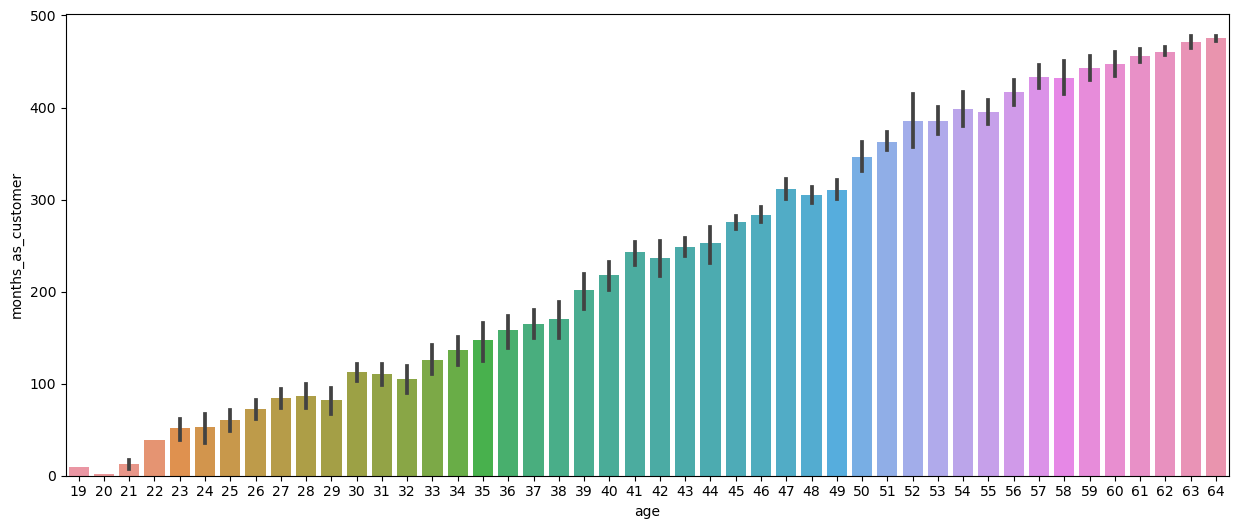

In [27]:
plt.figure(figsize=(15, 6))
sns.barplot(df['age'],df['months_as_customer'])

age increse it increses months as customer.

<AxesSubplot:xlabel='months_as_customer', ylabel='policy_annual_premium'>

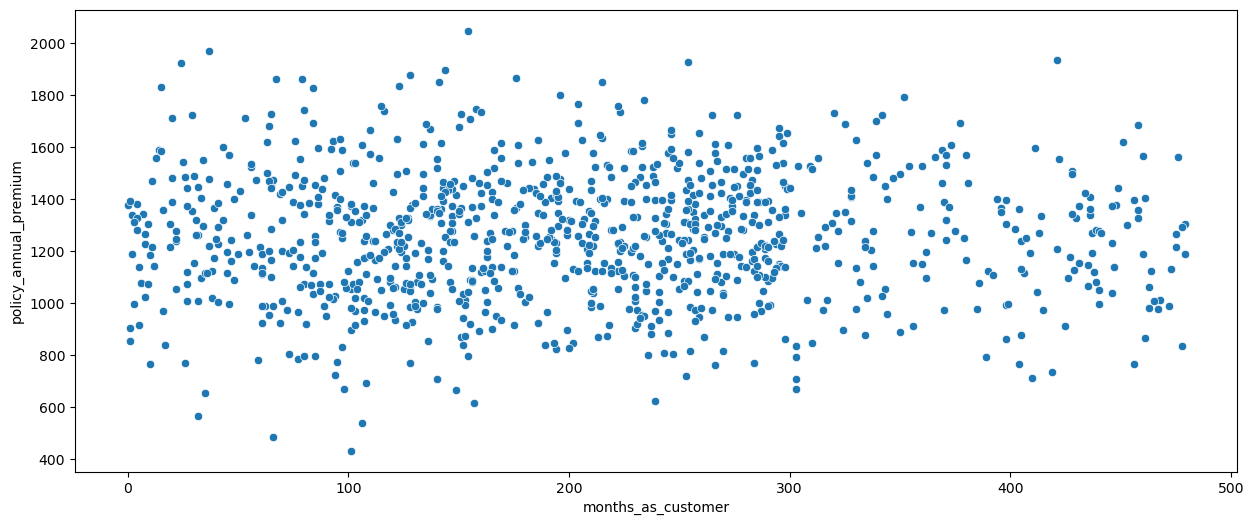

In [29]:
plt.figure(figsize=(15, 6))
sns.scatterplot(df['months_as_customer'],df['policy_annual_premium'])

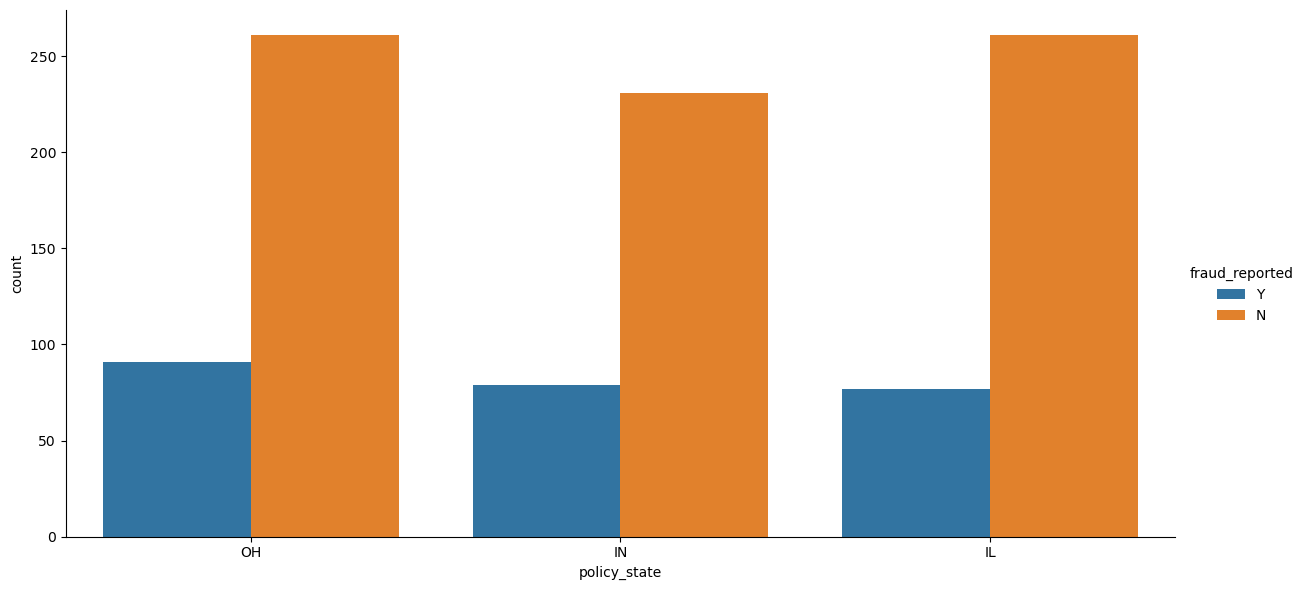

In [30]:

sns.catplot(x="policy_state", hue="fraud_reported", kind="count", data=df, height=6, aspect=2)
plt.show()

almost all three state reported fraud but OH has the highest no. of fraud reported.


<AxesSubplot:xlabel='injury_claim', ylabel='bodily_injuries'>

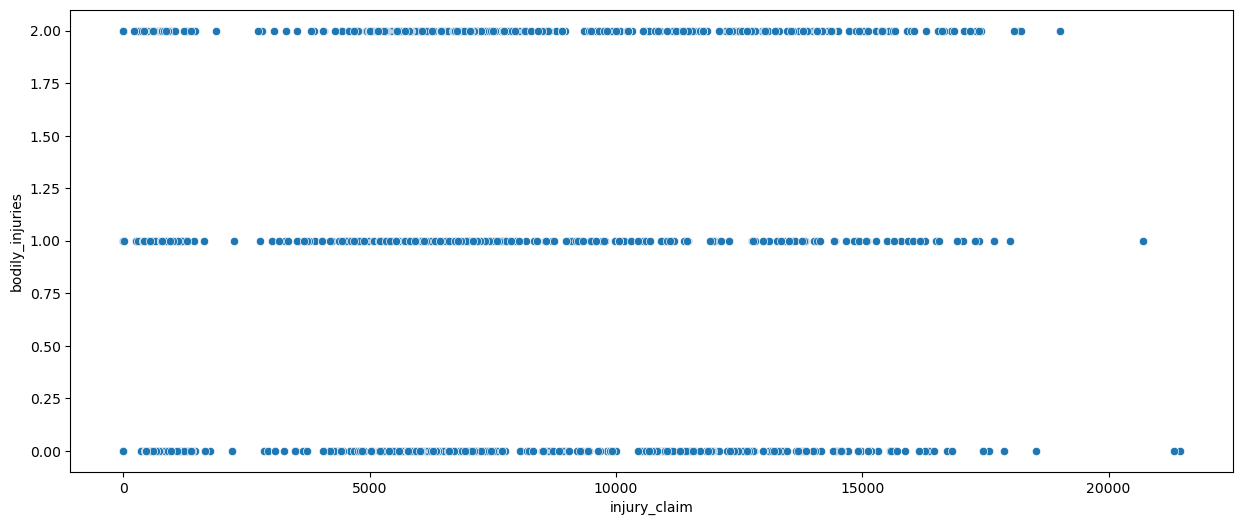

In [31]:
plt.figure(figsize=(15, 6))
sns.scatterplot(df['injury_claim'],df['bodily_injuries'])


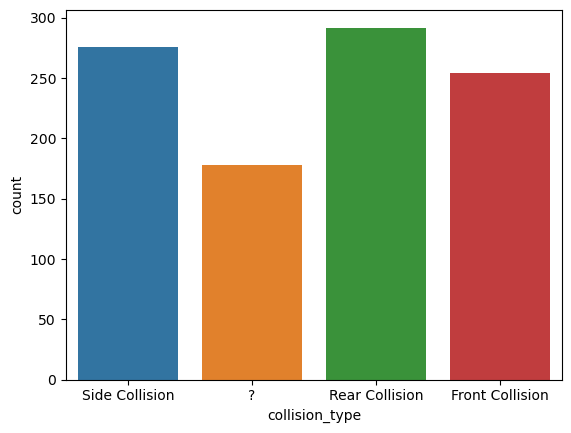

In [32]:
sns.countplot(df['collision_type'])
plt.show()

Highest no of collision is on rear side. which is around 280.

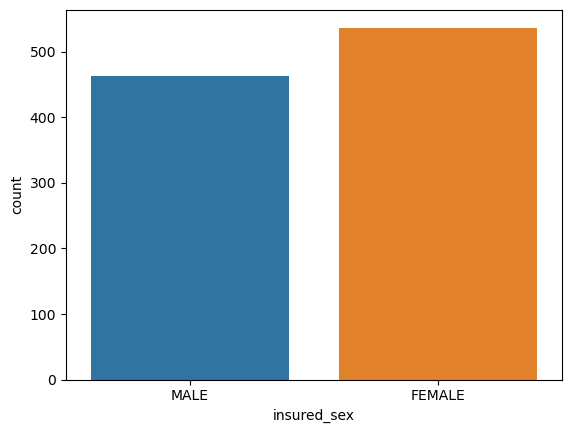

In [33]:
sns.countplot(df['insured_sex'])
plt.show()

Female is more insured comapare than male.

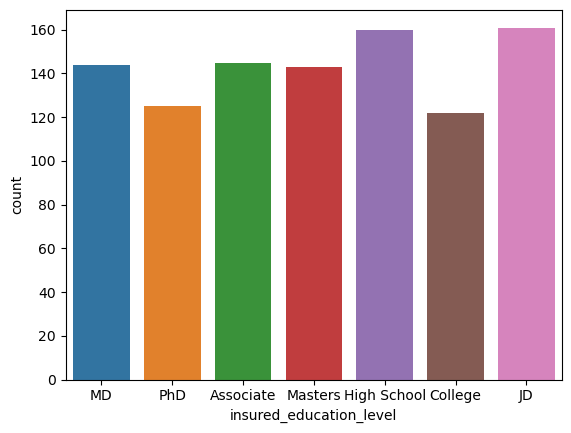

In [34]:
sns.countplot(df['insured_education_level'])
plt.show()

Insurance claims highset no of education is high school level.

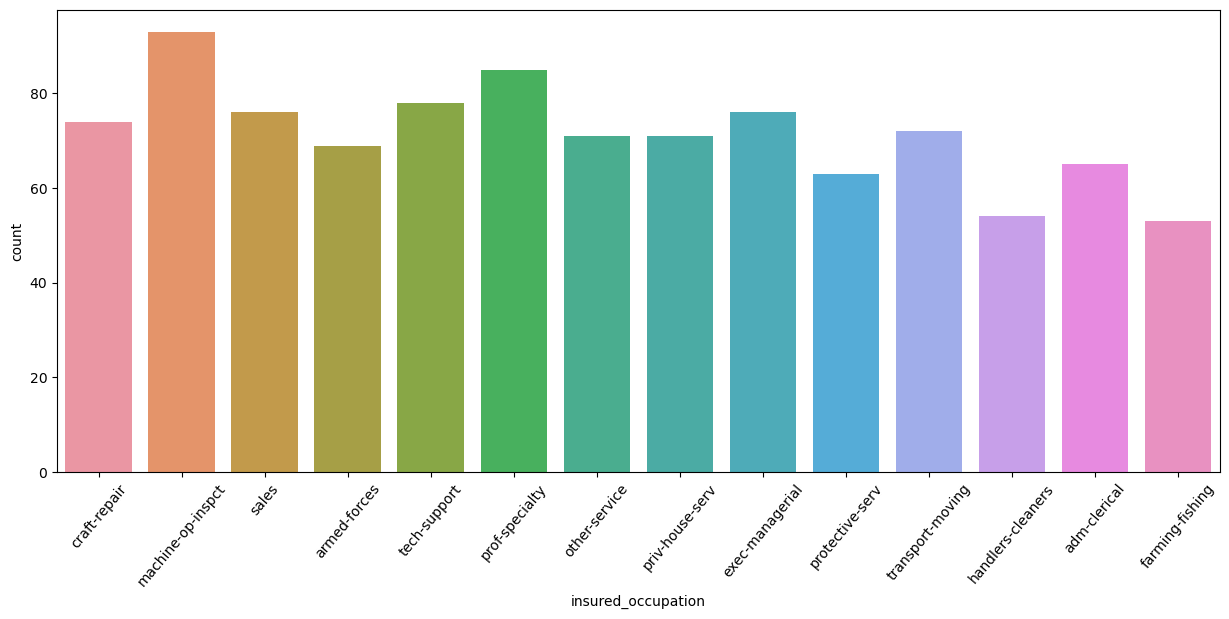

In [35]:
plt.figure(figsize=(15, 6))
sns.countplot(df['insured_occupation'])
plt.xticks(rotation=50)
plt.show()

we can see all policy holders profession in no of count , highest no. of persons are machine oeration and inspection.

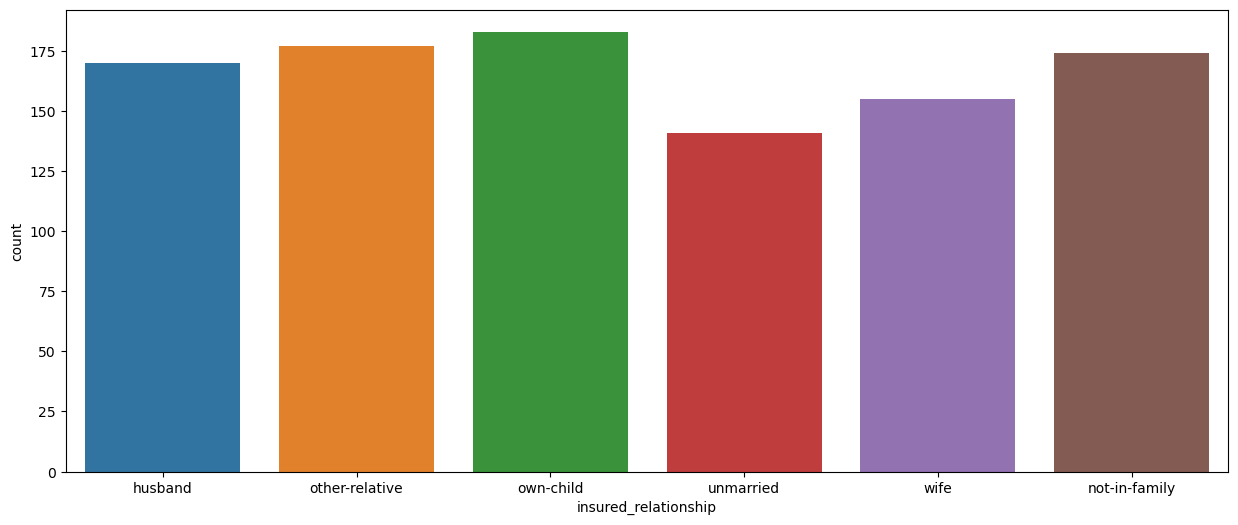

In [36]:
plt.figure(figsize=(15, 6))
sns.countplot(df['insured_relationship'])
plt.show()

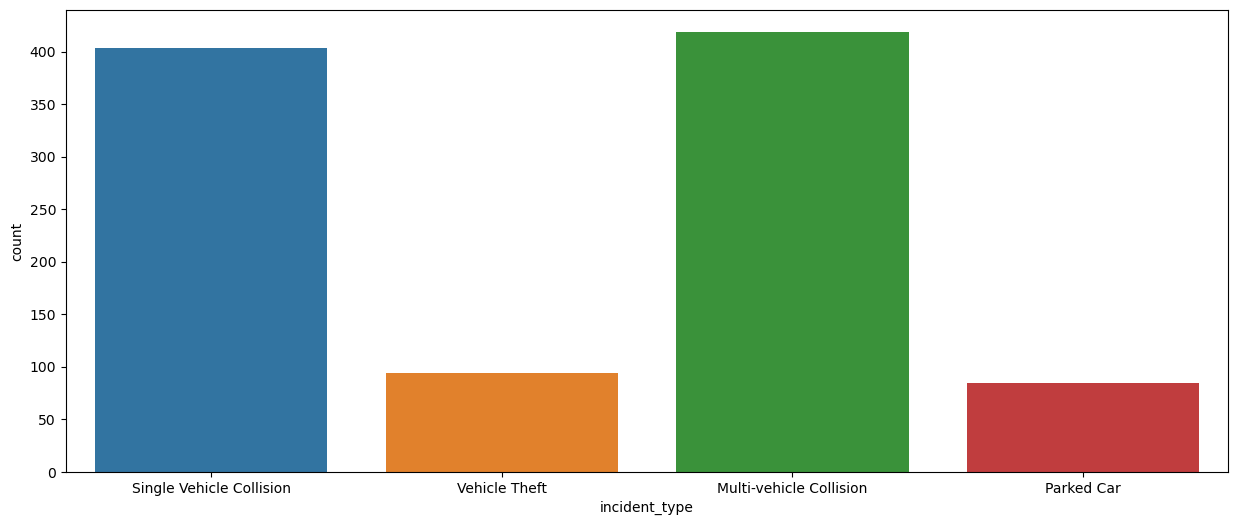

In [37]:
plt.figure(figsize=(15, 6))
sns.countplot(df['incident_type'])
plt.show()

Multi vehicle collision has highest incident type for insurance claim, there is only 100 cases for vehile theft an parked car cases.

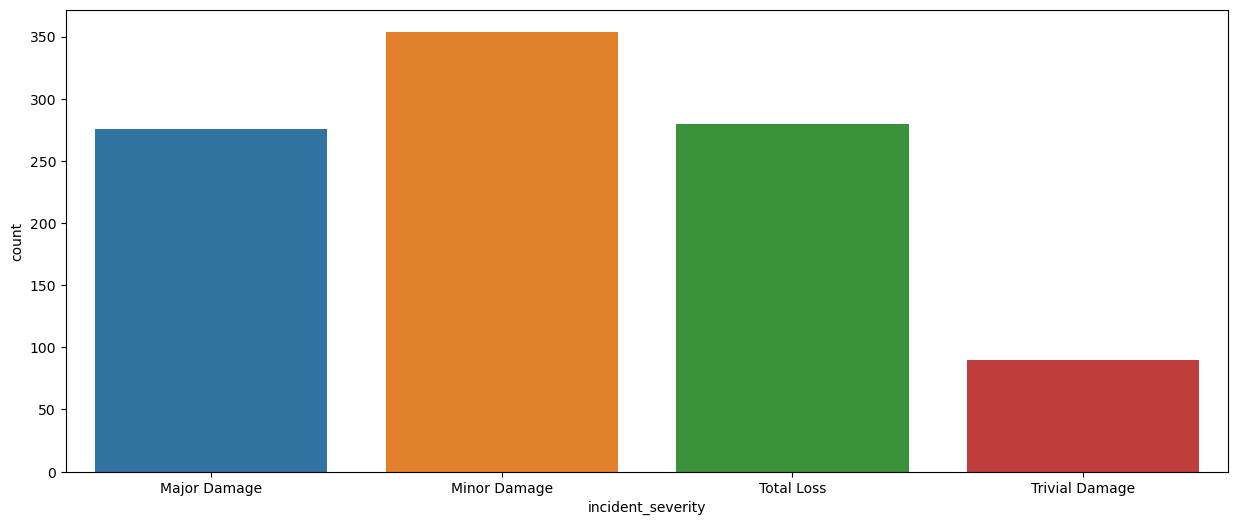

In [38]:
plt.figure(figsize=(15, 6))
sns.countplot(df['incident_severity'])
plt.show()

350+ incident has minor damage and 50 cases for trivial damage.

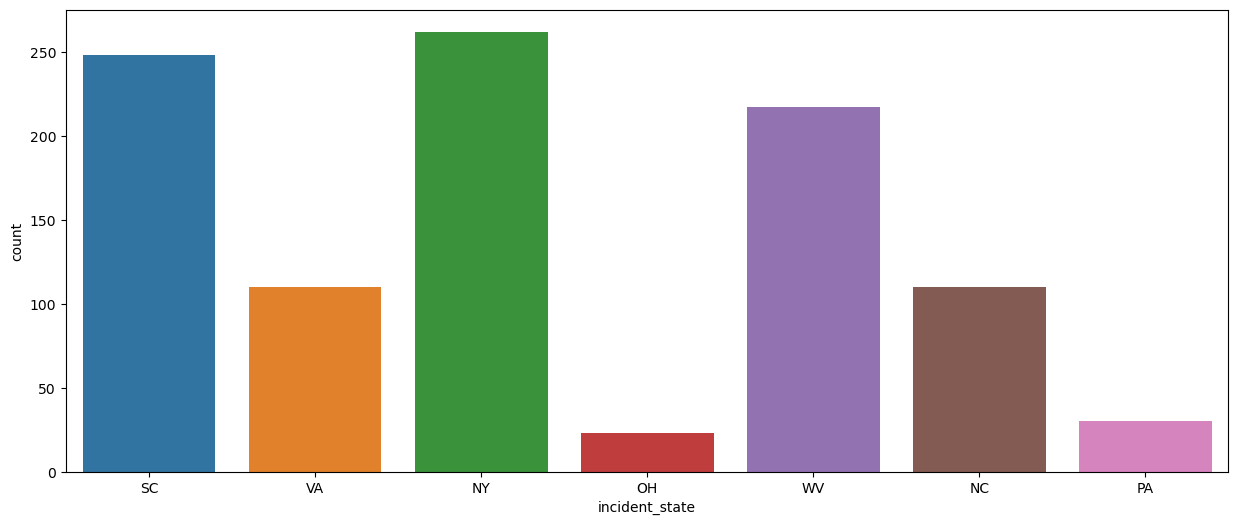

In [39]:
plt.figure(figsize=(15, 6))
sns.countplot(df['incident_state'])
plt.show()

Most incident are happen in SC, NY and WV state. 

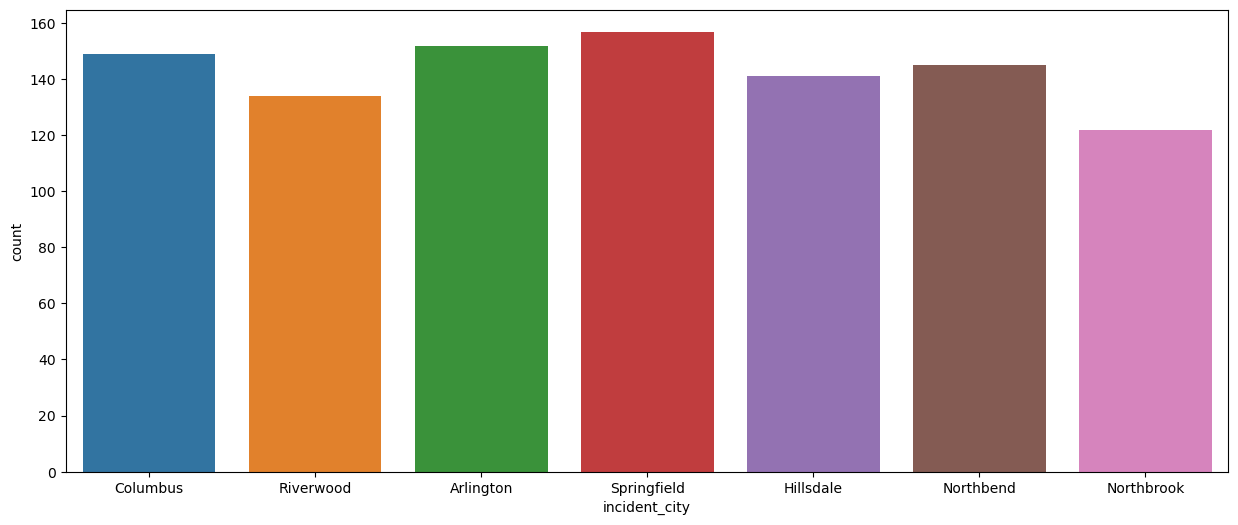

In [40]:
plt.figure(figsize=(15, 6))
sns.countplot(df['incident_city'])
plt.show()

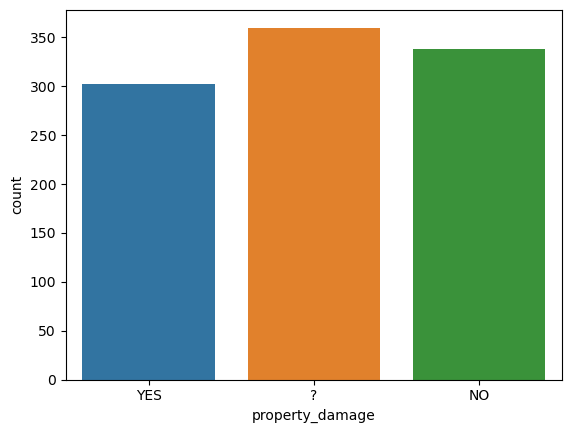

In [41]:

sns.countplot(df['property_damage'])
plt.show()

300 times property damage is occured.

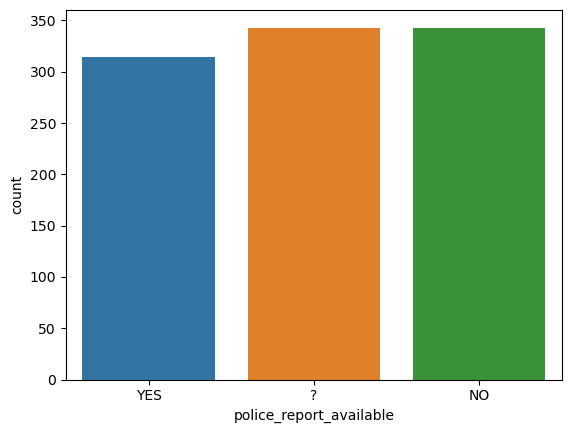

In [42]:
sns.countplot(df['police_report_available'])
plt.show()

in 300 cases we policy report available , while more than 300 cases we don't have police report available.

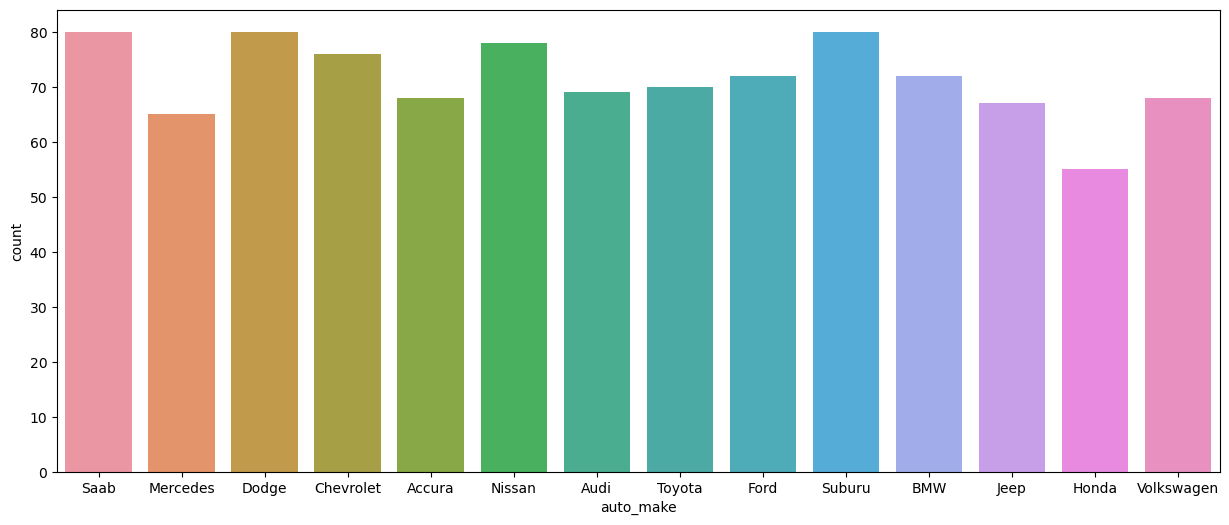

In [43]:
plt.figure(figsize=(15, 6))
sns.countplot(df['auto_make'])
plt.show()


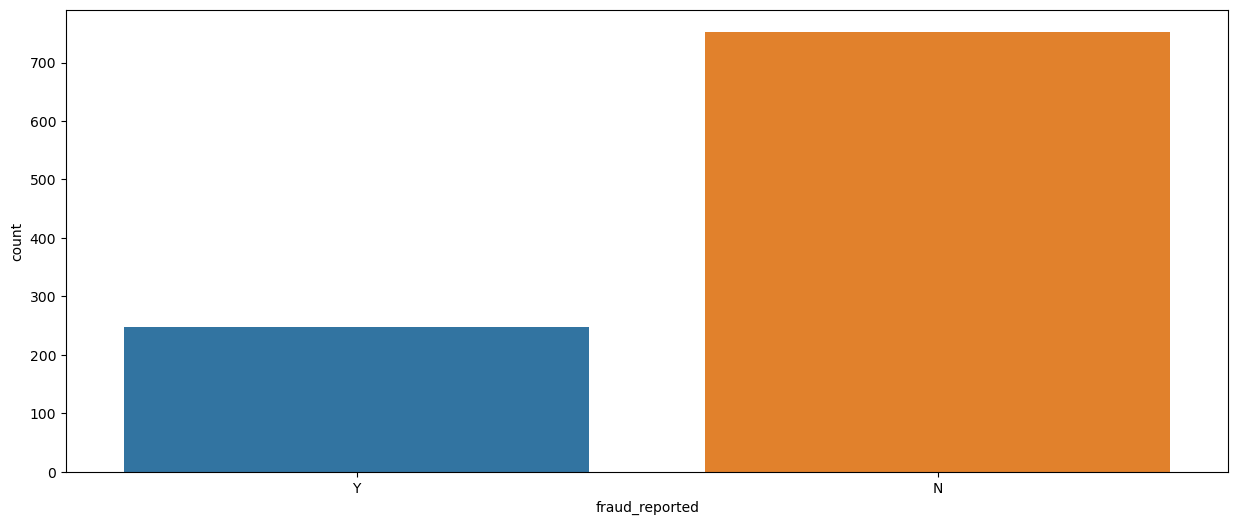

In [44]:
plt.figure(figsize=(15, 6))
sns.countplot(df['fraud_reported'])
plt.show()

almost we have 250+ cases of fraud reported. 

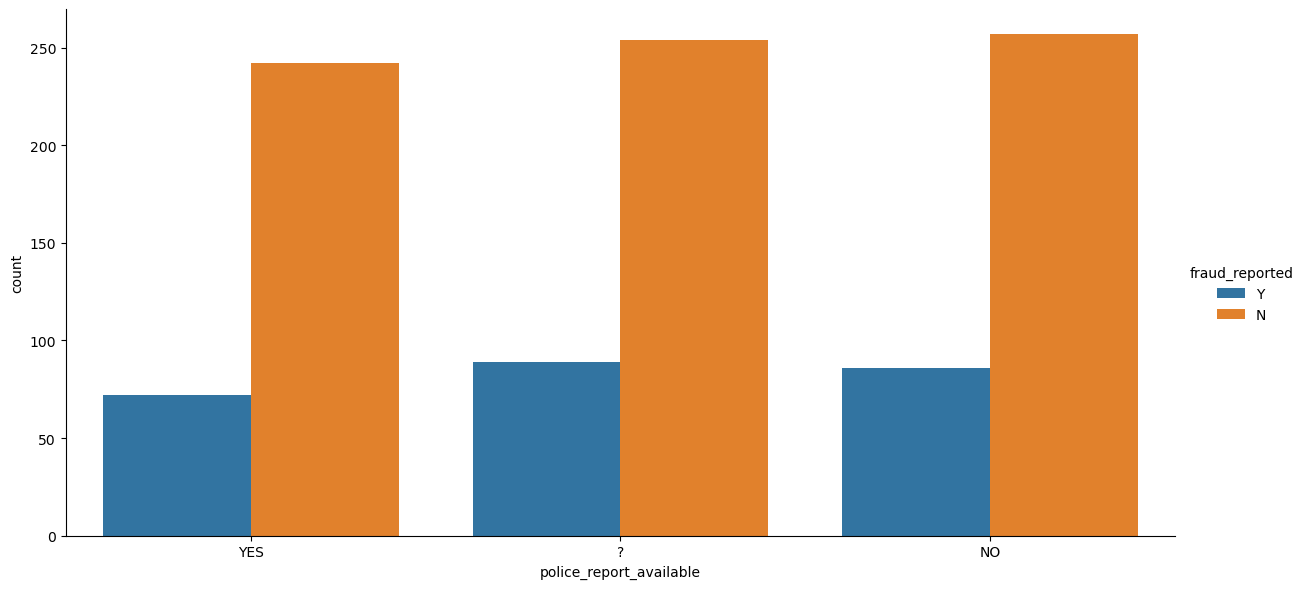

In [45]:
sns.catplot(x="police_report_available", hue="fraud_reported", kind="count", data=df, height=6, aspect=2)
plt.show()

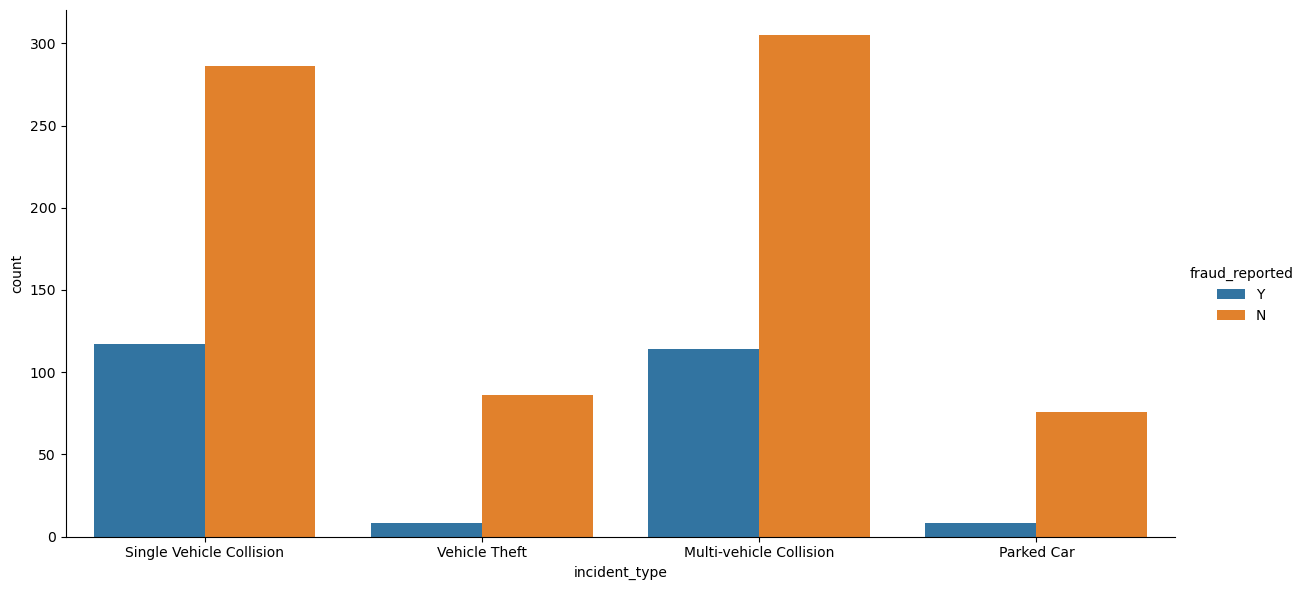

In [46]:
sns.catplot(x="incident_type", hue="fraud_reported", kind="count", data=df, height=6, aspect=2)
plt.show()

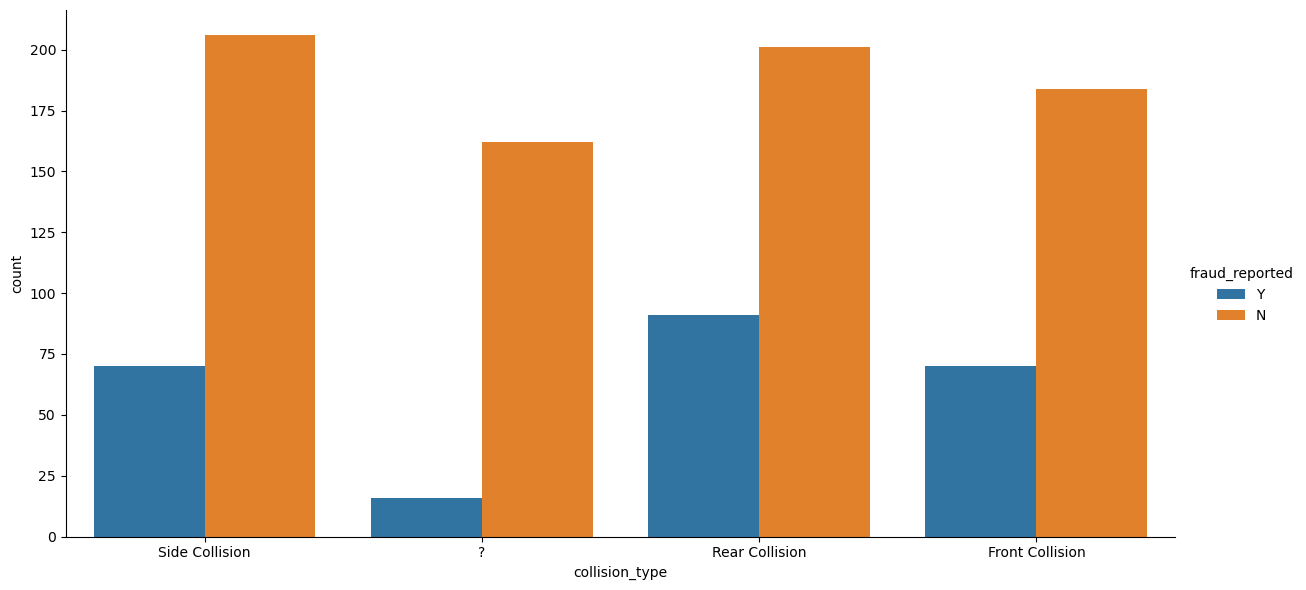

In [47]:
sns.catplot(x="collision_type", hue="fraud_reported", kind="count", data=df, height=6, aspect=2)
plt.show()

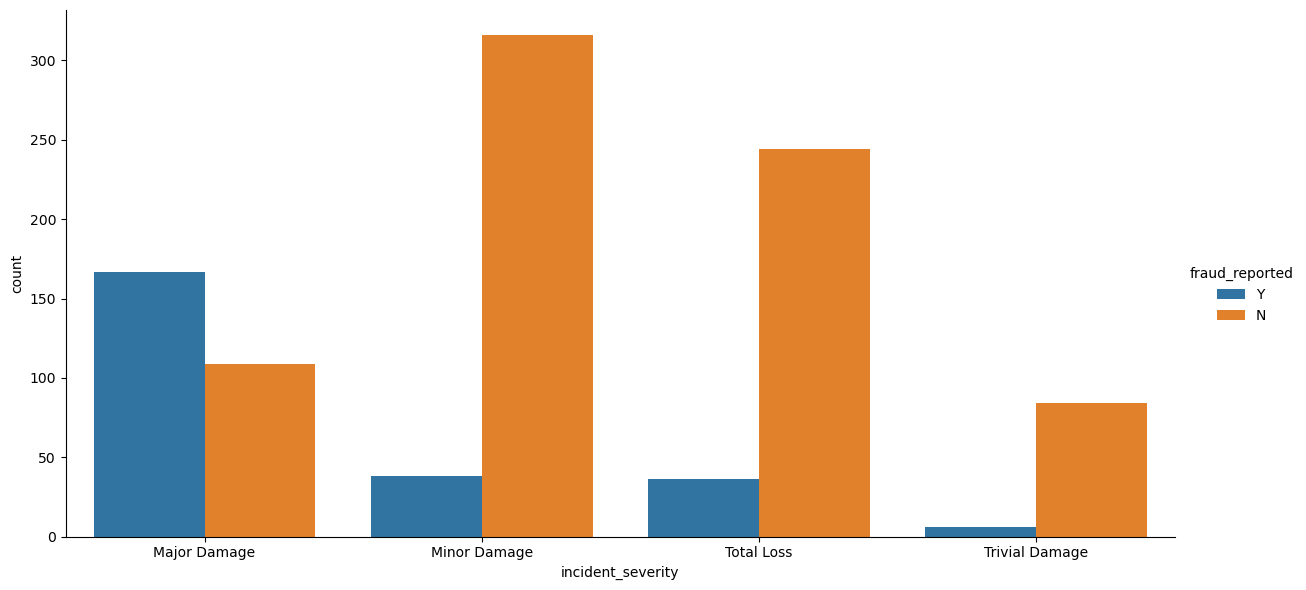

In [48]:
sns.catplot(x="incident_severity", hue="fraud_reported", kind="count", data=df, height=6, aspect=2)
plt.show()

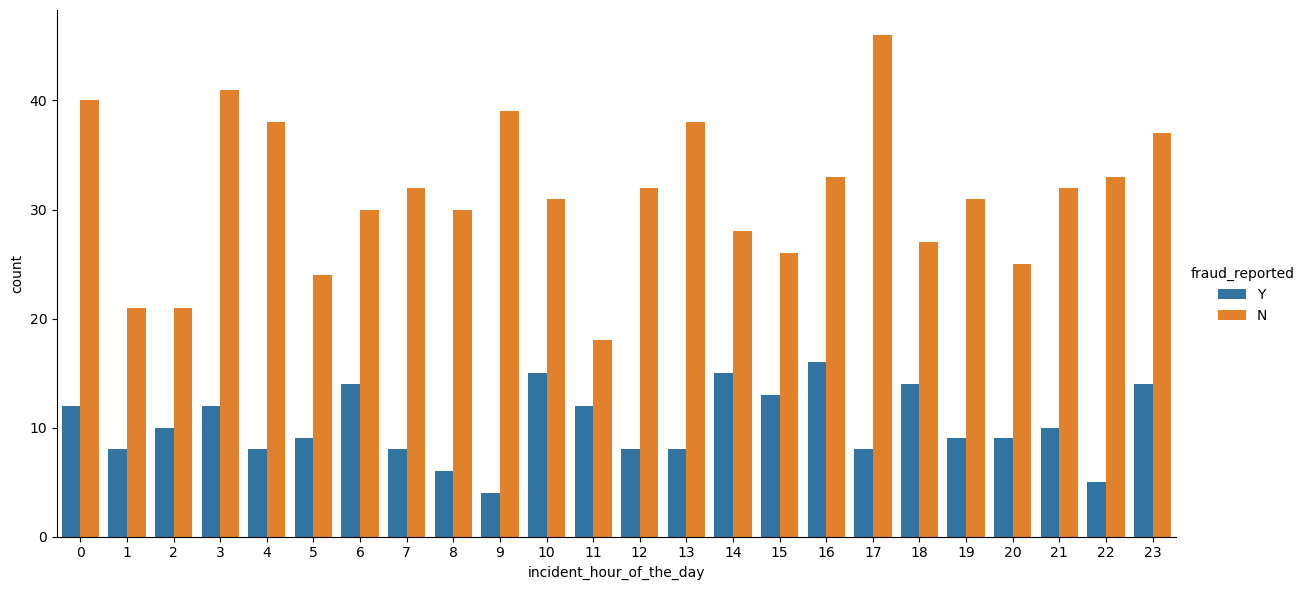

In [49]:
sns.catplot(x="incident_hour_of_the_day", hue="fraud_reported", kind="count", data=df, height=6, aspect=2)
plt.show()

most of fraud reported incident hour is 16:00 and 10:00.

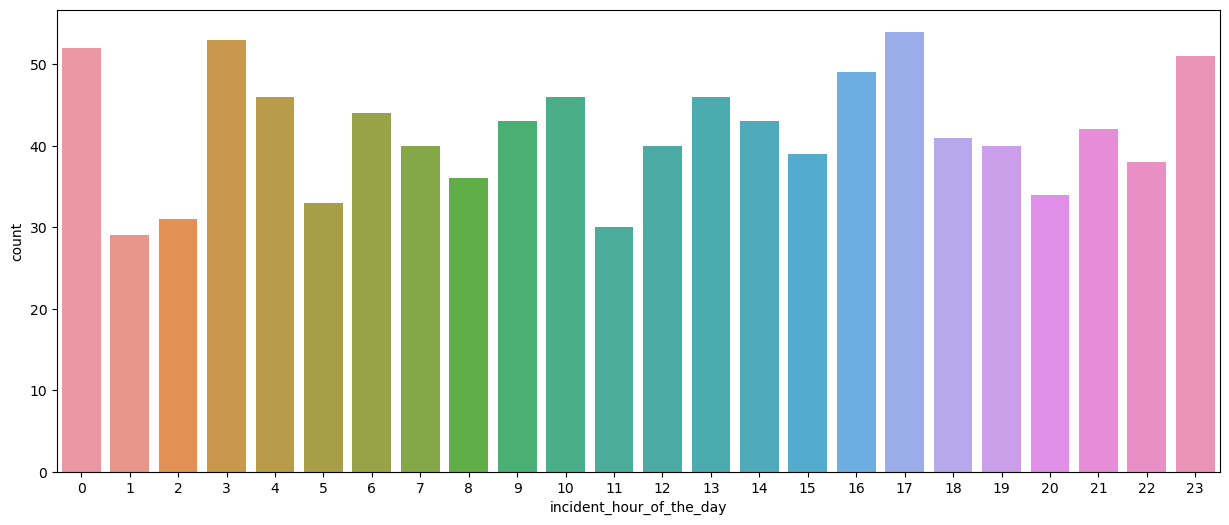

In [50]:
plt.figure(figsize=(15, 6))
sns.countplot(df['incident_hour_of_the_day'])
plt.show()

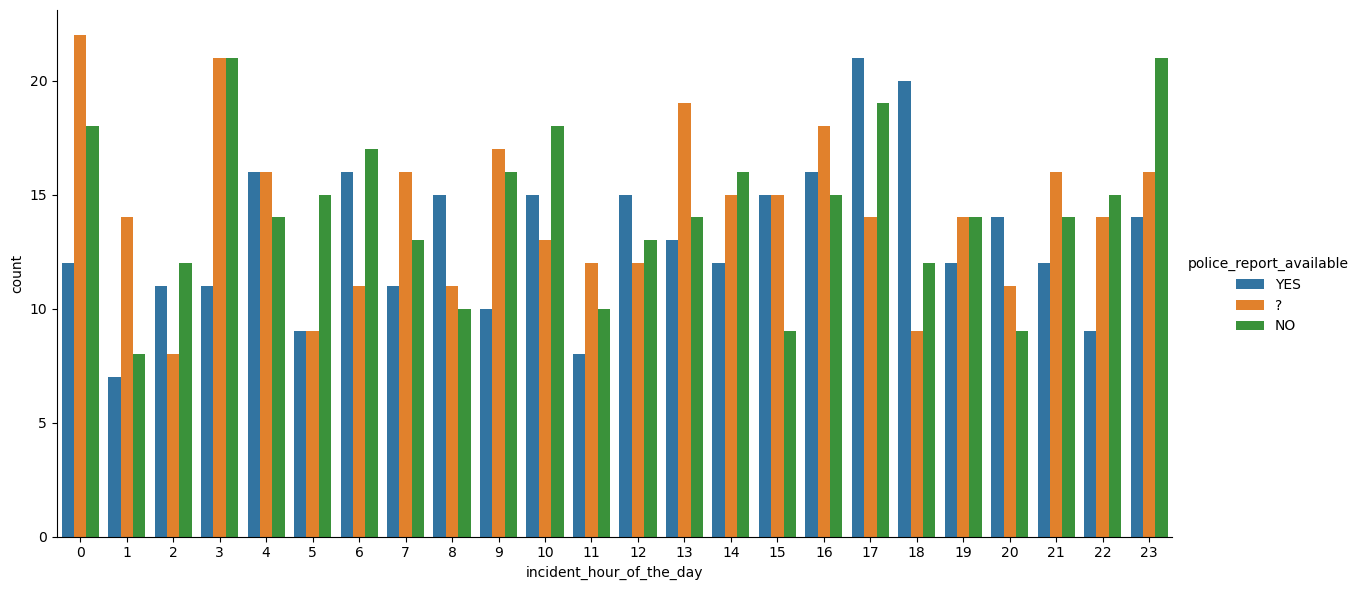

In [51]:
sns.catplot(x="incident_hour_of_the_day", hue="police_report_available", kind="count", data=df, height=6, aspect=2)
plt.show()

On evening no. of policy report availble more tha not availble. 

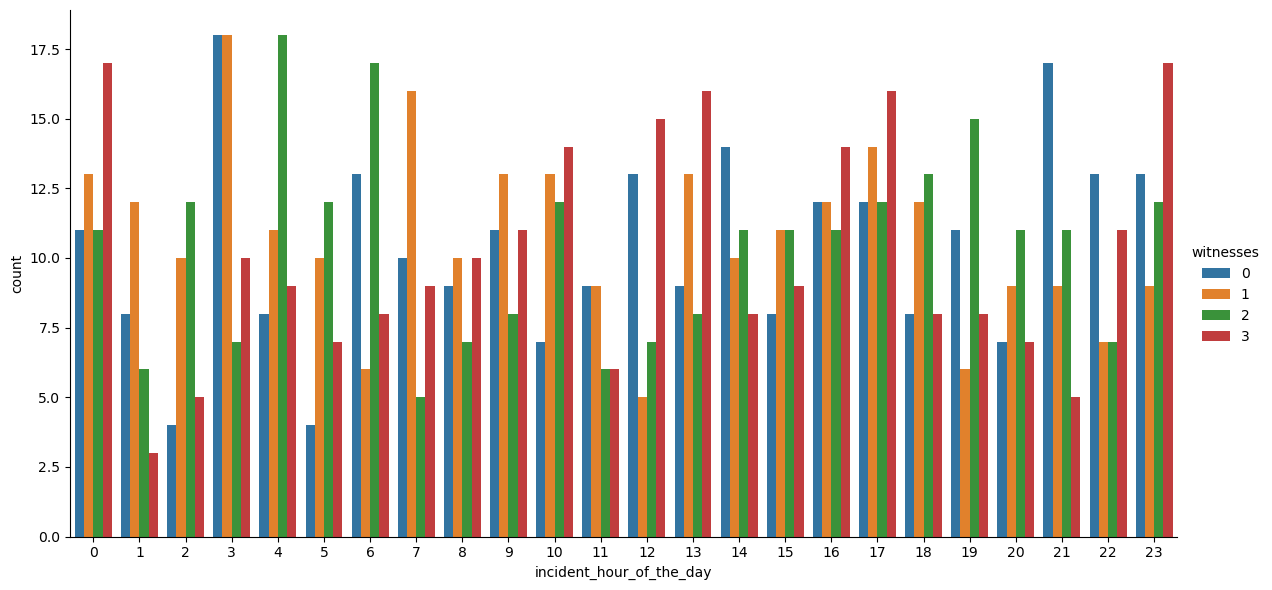

In [52]:
sns.catplot(x="incident_hour_of_the_day", hue="witnesses", kind="count", data=df, height=6, aspect=2)
plt.show()

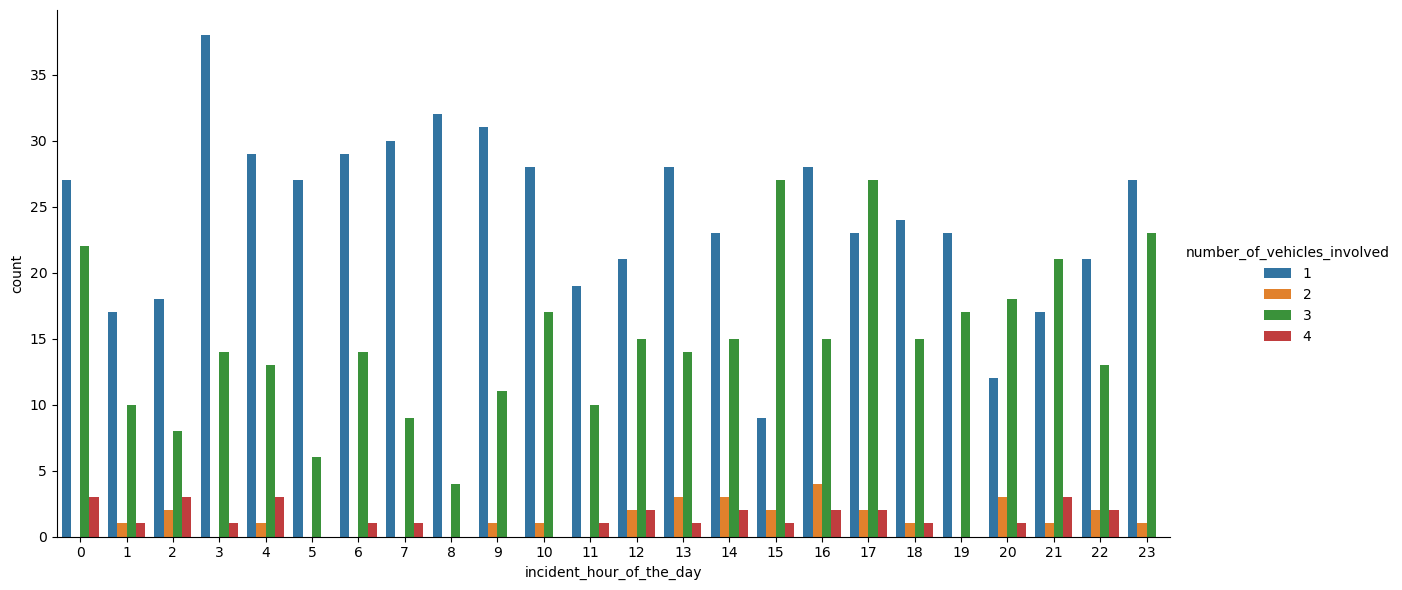

In [53]:
sns.catplot(x="incident_hour_of_the_day", hue="number_of_vehicles_involved", kind="count", data=df, height=6, aspect=2)
plt.show()

most incident no of vehicled involvef either 1 or 3.

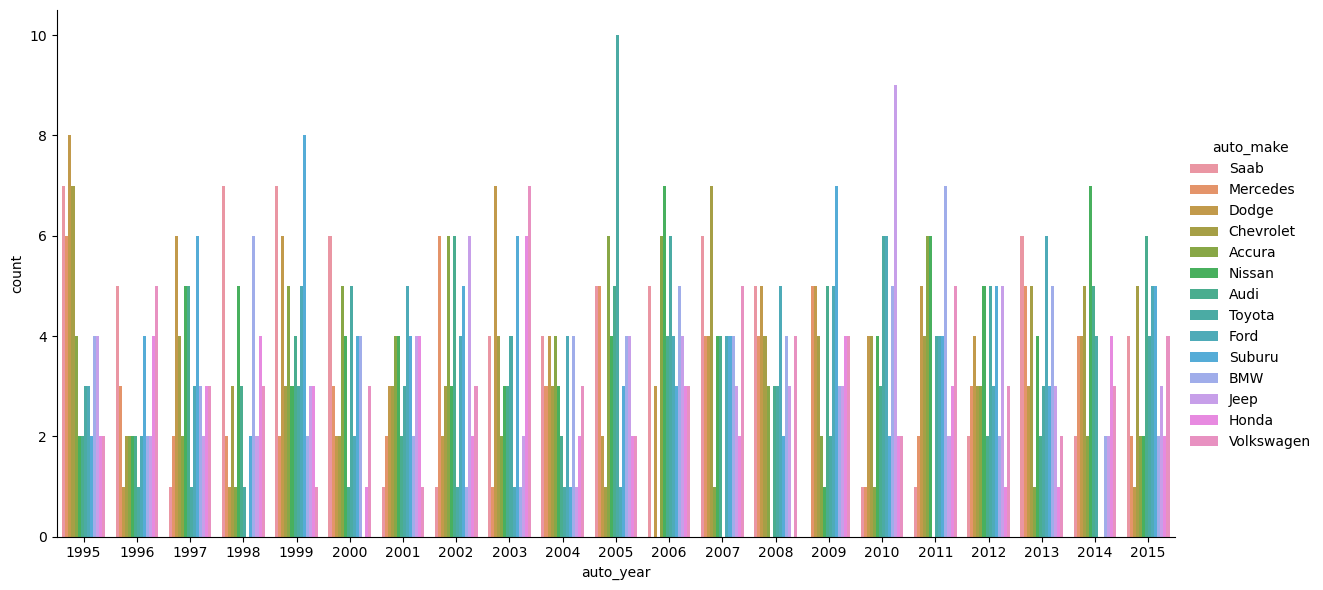

In [54]:
sns.catplot(x="auto_year", hue="auto_make", kind="count", data=df, height=6, aspect=2)
plt.show()

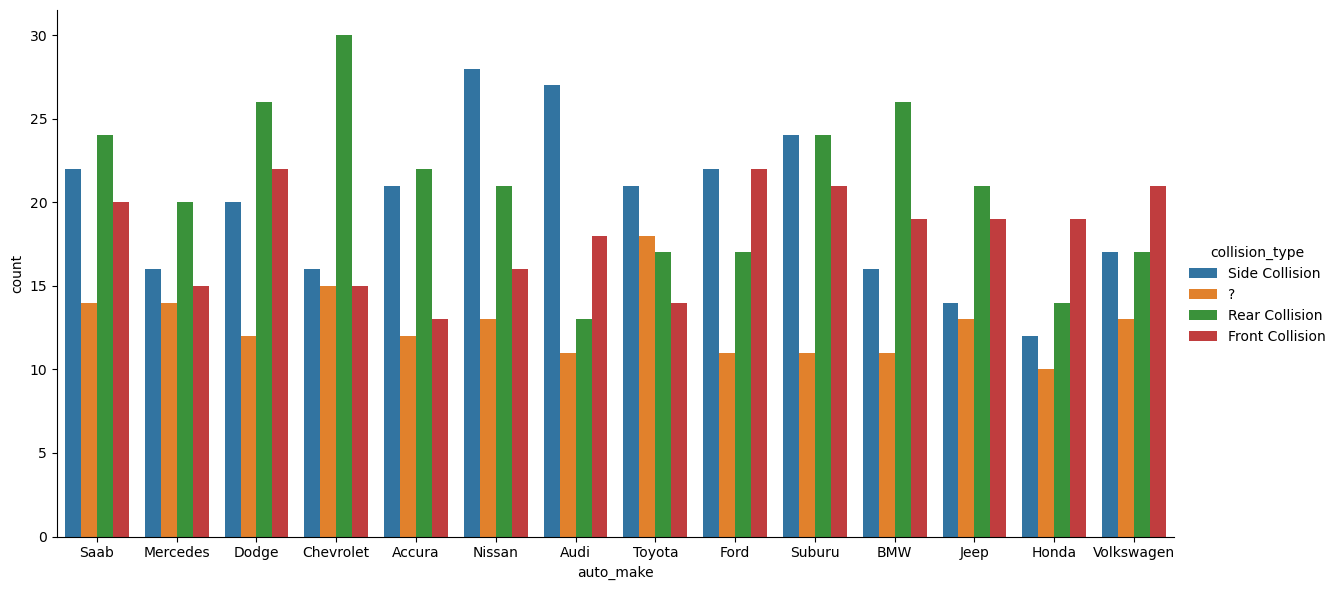

In [55]:
sns.catplot(x="auto_make", hue="collision_type", kind="count", data=df, height=6, aspect=2)
plt.show()

highest no. of side collision car meke is Nissan
highest no. of Rear collision car meke is Chevrolate
highest no. of front collision car meke is Dodge

<AxesSubplot:xlabel='auto_year', ylabel='policy_annual_premium'>

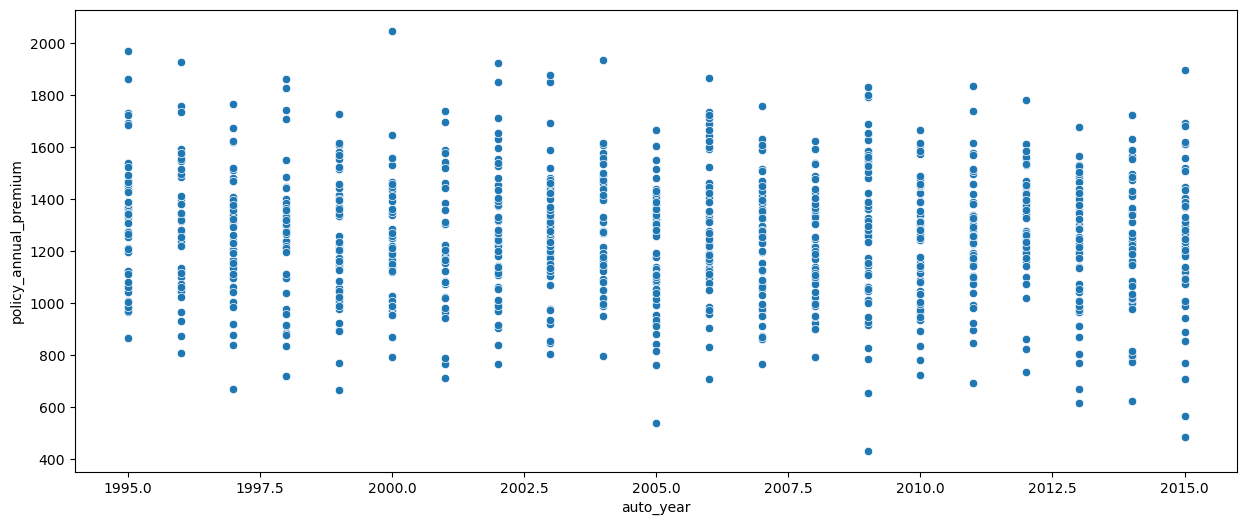

In [56]:
plt.figure(figsize=(15, 6))
sns.scatterplot(df['auto_year'],df['policy_annual_premium'])

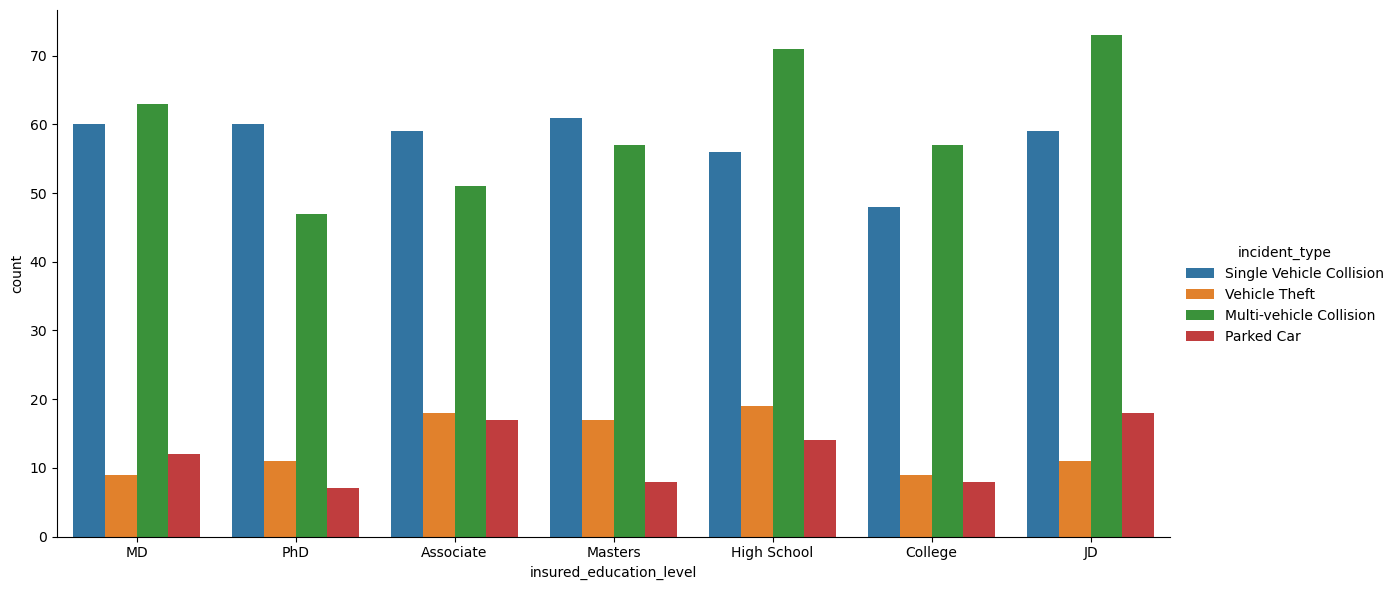

In [57]:
sns.catplot(x="insured_education_level", hue="incident_type", kind="count", data=df, height=6, aspect=2)
plt.show()

persons has highest education has high school has more cases of collision.

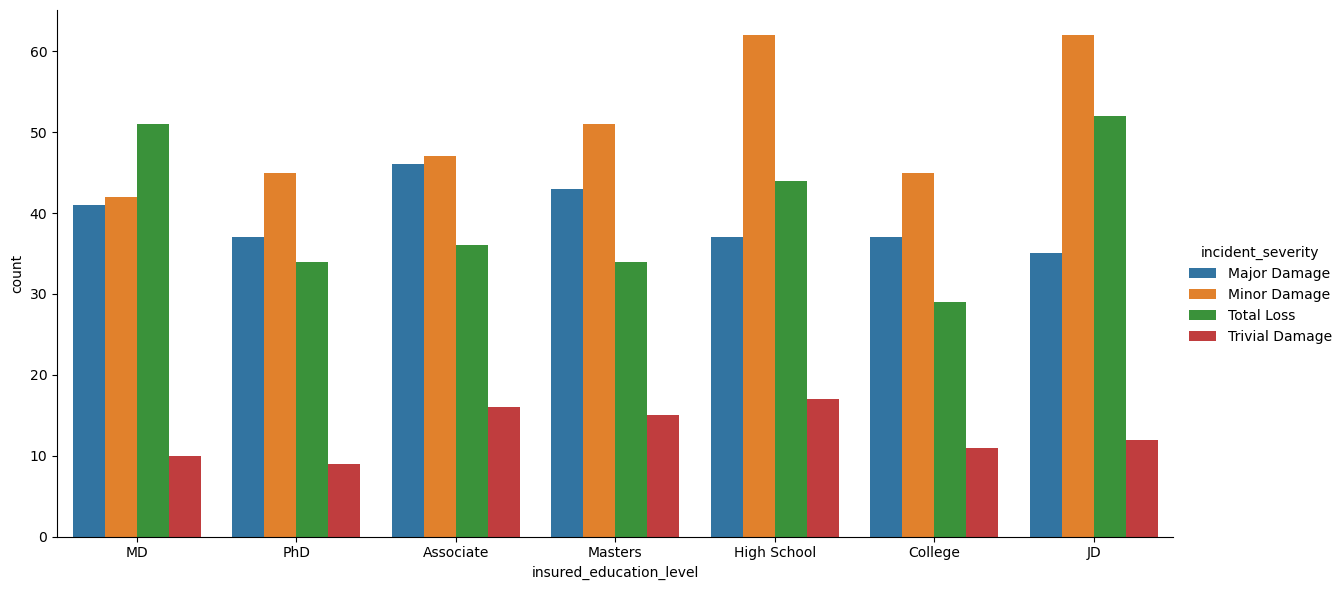

In [58]:
sns.catplot(x="insured_education_level", hue="incident_severity", kind="count", data=df, height=6, aspect=2)
plt.show()

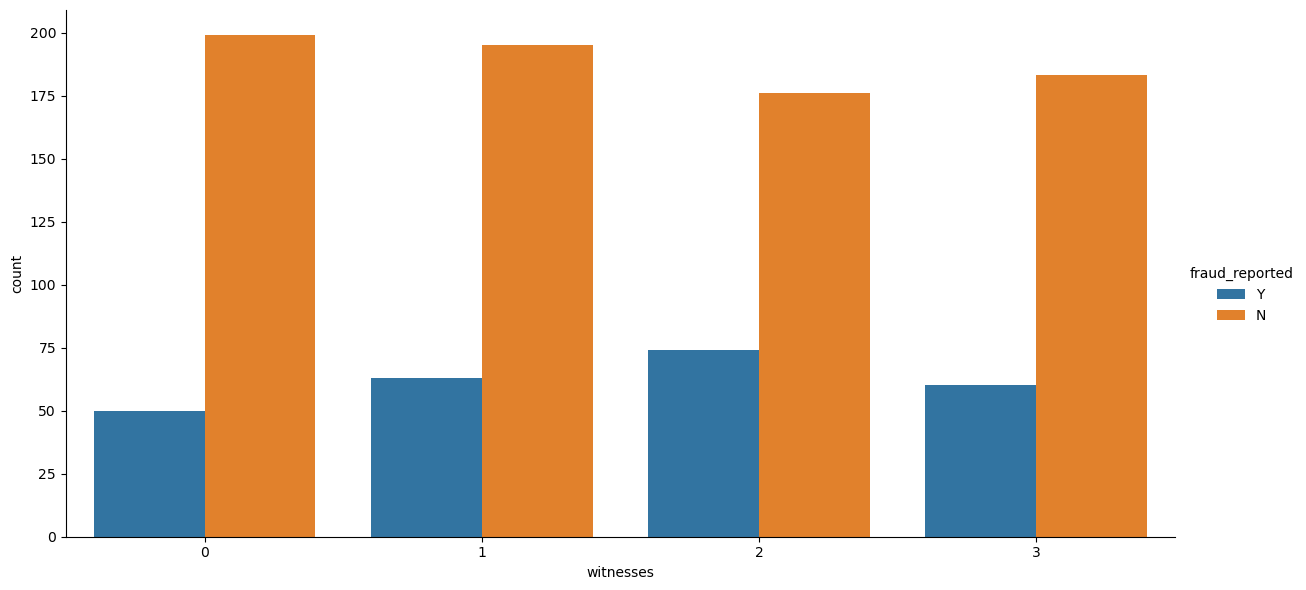

In [59]:
sns.catplot(x="witnesses", hue="fraud_reported", kind="count", data=df, height=6, aspect=2)
plt.show()

<AxesSubplot:xlabel='total_claim_amount', ylabel='vehicle_claim'>

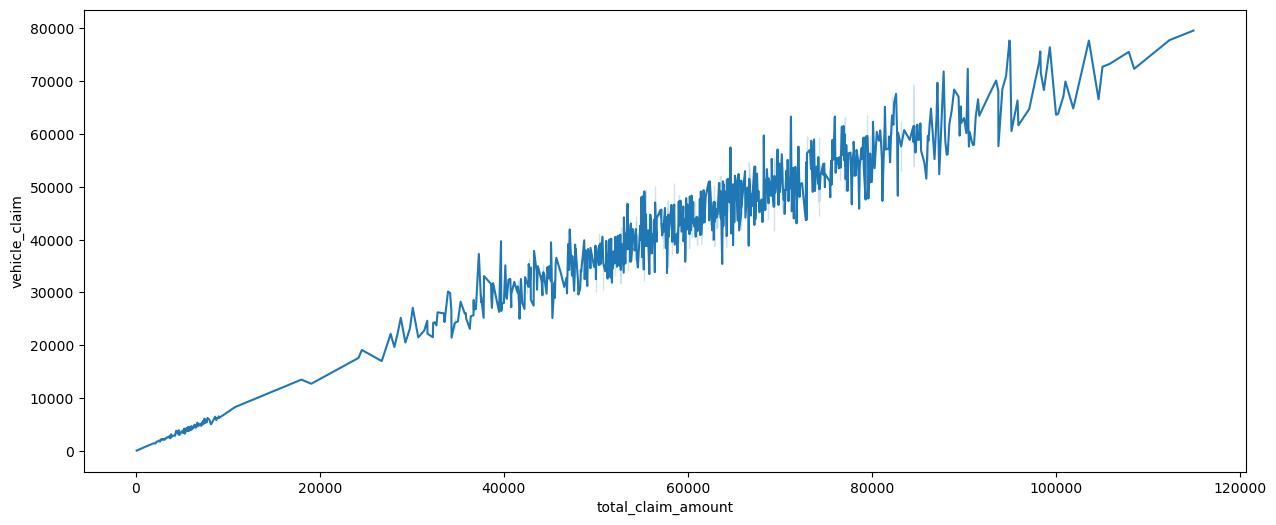

In [60]:
plt.figure(figsize=(15, 6))
sns.lineplot(df['total_claim_amount'],df['vehicle_claim'])

<AxesSubplot:xlabel='total_claim_amount', ylabel='property_claim'>

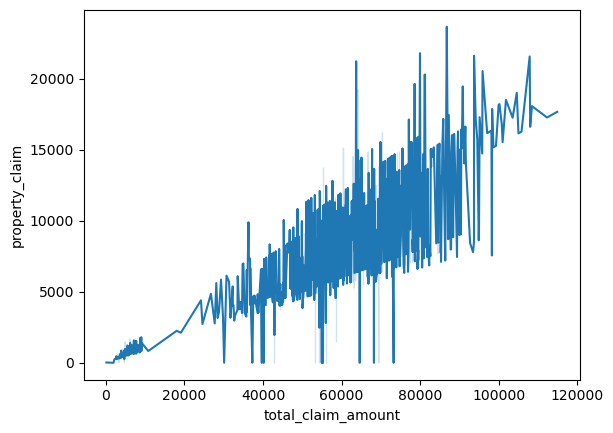

In [61]:
sns.lineplot(df['total_claim_amount'],df['property_claim'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [63]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
df1=df.drop(['policy_bind_date','policy_csl','policy_number','insured_hobbies','policy_state','incident_date','incident_state','insured_relationship','incident_city','incident_location','auto_make','auto_model'],axis=1)

In [66]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [67]:
le = LabelEncoder()
df1['insured_sex'] = le.fit_transform(df1['insured_sex'])
df1['insured_education_level'] = le.fit_transform(df1['insured_education_level'])
df1['insured_occupation'] = le.fit_transform(df1['insured_occupation'])
df1['incident_type'] = le.fit_transform(df1['incident_type'])
df1['collision_type'] = le.fit_transform(df1['collision_type'])
df1['incident_severity'] = le.fit_transform(df1['incident_severity'])
df1['authorities_contacted'] = le.fit_transform(df1['authorities_contacted'])
df1['property_damage'] = le.fit_transform(df1['property_damage'])
df1['police_report_available'] = le.fit_transform(df1['police_report_available'])
df1['fraud_reported'] = le.fit_transform(df1['fraud_reported'])

here we convert object data type column to numeric values.

<AxesSubplot:>

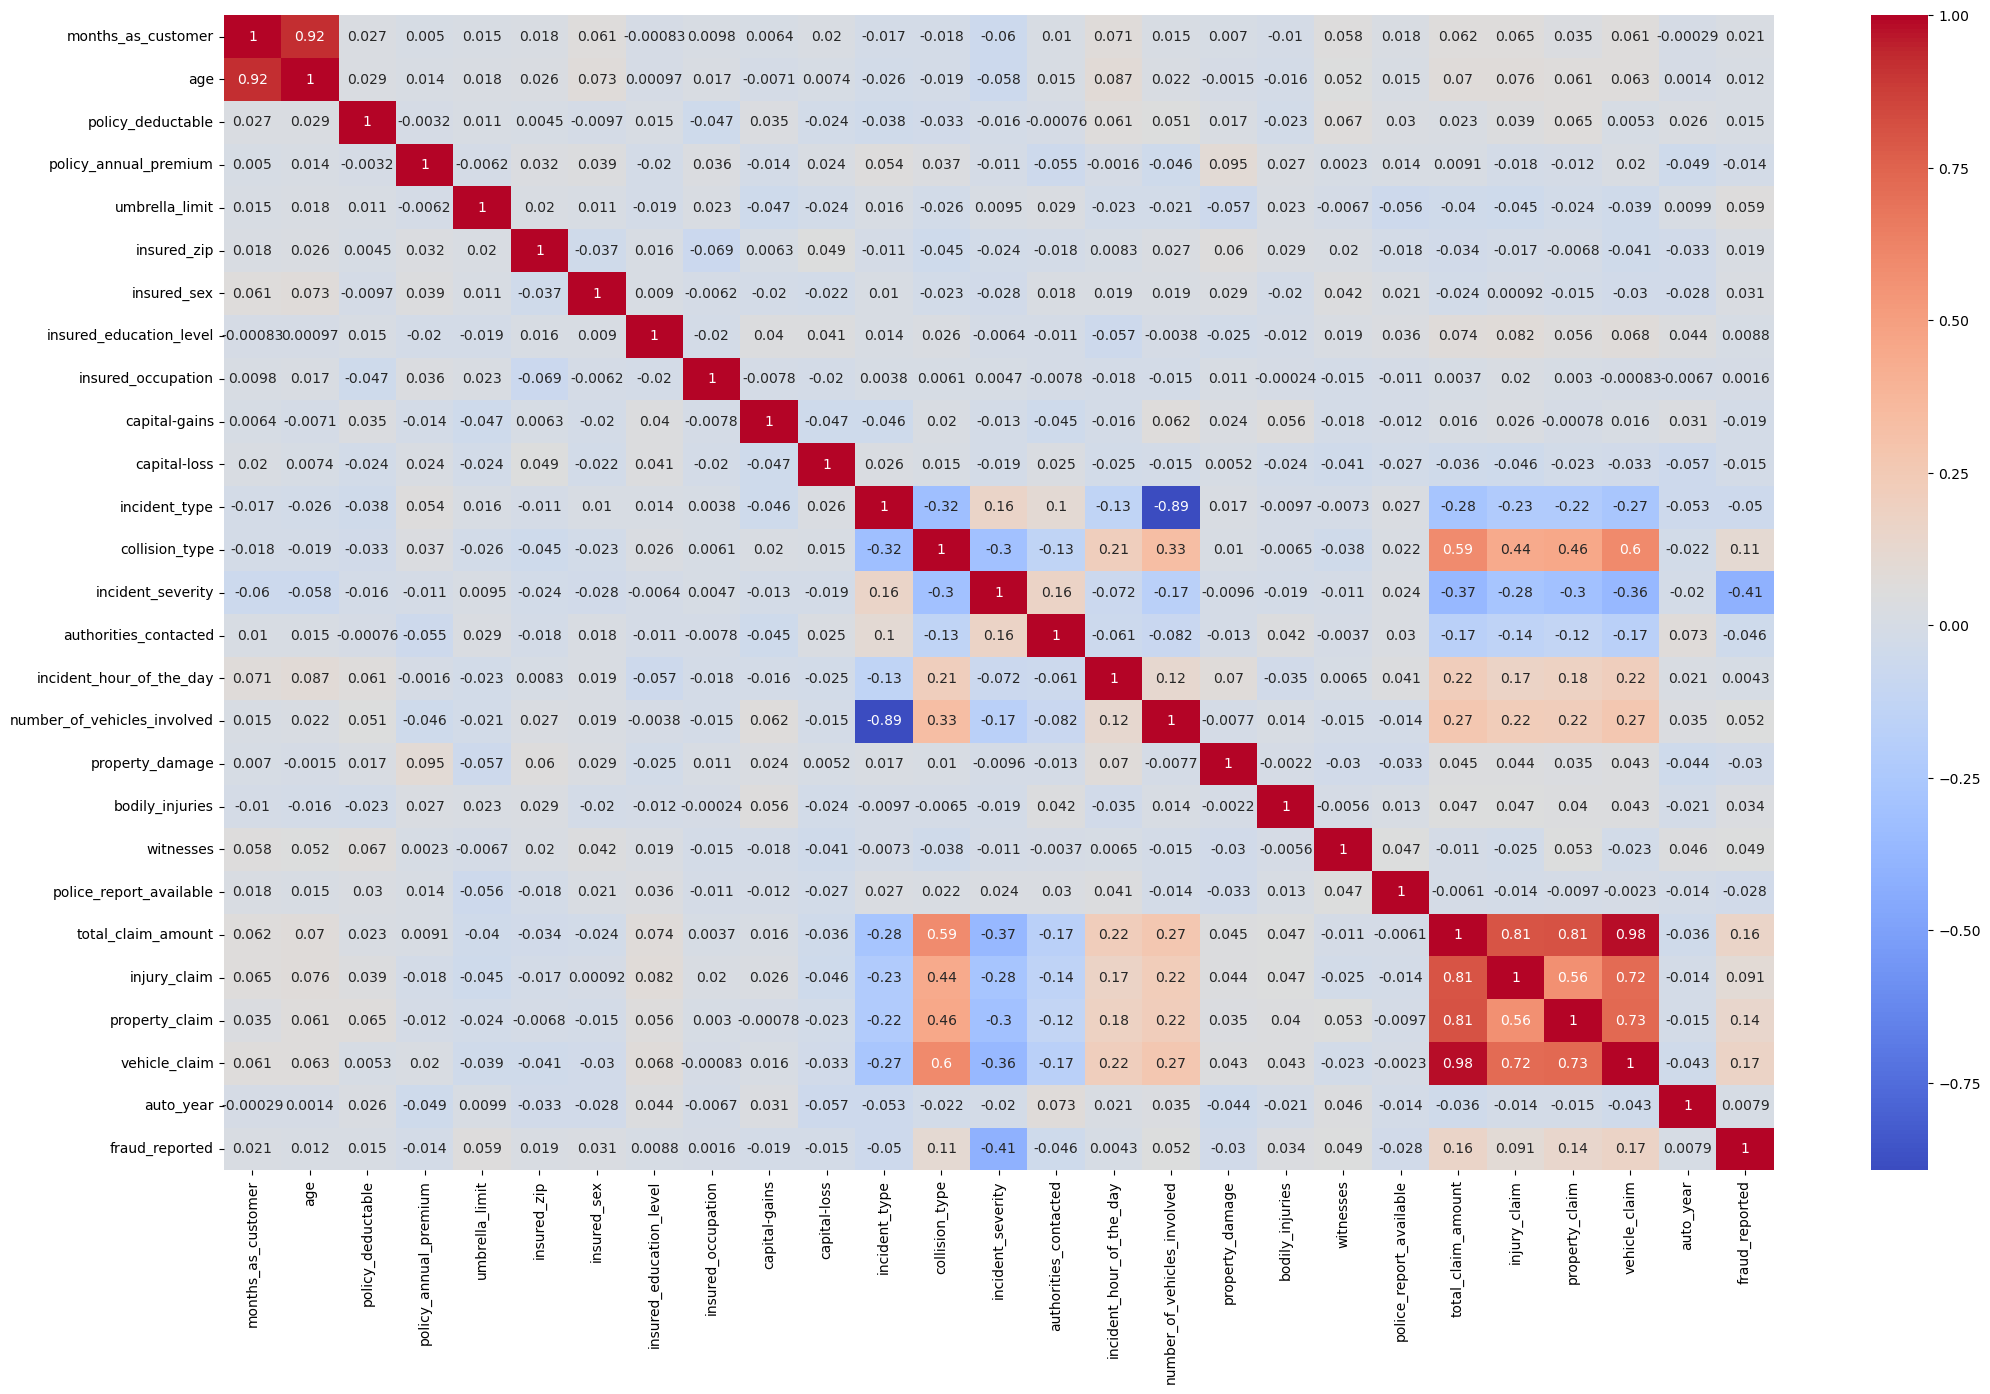

In [68]:
plt.figure(figsize=(25,15))
sns.heatmap(df1.corr(),cmap='coolwarm',annot=True)

# Model Insurance claim fraud detection

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_zip                  1000 non-null   int64  
 6   insured_sex                  1000 non-null   int32  
 7   insured_education_level      1000 non-null   int32  
 8   insured_occupation           1000 non-null   int32  
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   int32  
 12  collision_type               1000 non-null   int32  
 13  incident_severity  

In [71]:
x = df1.iloc[:,:-1]

In [72]:
y=df1.iloc[:,-1]

In [73]:
x.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,capital-gains,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,466132,1,4,2,53300,...,1,2,1,2,2,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,468176,1,4,6,0,...,1,0,0,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,430632,0,6,11,35100,...,3,1,2,3,1,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,608117,0,6,1,48900,...,1,0,1,2,1,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,610706,1,0,11,66000,...,1,1,0,1,1,6500,1300,650,4550,2009


In [74]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
st=StandardScaler()
x=st.fit_transform(x)
x

array([[ 1.07813958,  0.99083647, -0.22238259, ...,  1.16550497,
         0.74965272, -0.1834404 ],
       [ 0.2089946 ,  0.33407345,  1.41278352, ..., -1.37269599,
        -1.82334593,  0.31549088],
       [-0.60800168, -1.08891308,  1.41278352, ..., -0.73607206,
        -0.78556451,  0.31549088],
       ...,
       [-0.64276748, -0.54161057, -1.03996564, ...,  0.0208261 ,
         0.77190224, -1.5139238 ],
       [ 2.20802805,  2.52328351,  1.41278352, ..., -0.45197603,
        -0.07357971, -1.18130295],
       [ 2.19064515,  2.3043625 , -0.22238259, ..., -1.34366428,
        -1.81434017,  0.31549088]])

Adding scaller method to our data for increasing accuracy of our model.

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.18,random_state=20)

In [78]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.85
[[135   7]
 [ 20  18]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       142
           1       0.72      0.47      0.57        38

    accuracy                           0.85       180
   macro avg       0.80      0.71      0.74       180
weighted avg       0.84      0.85      0.84       180



Logistic Regression model accurcay score is 85%.

In [79]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7444444444444445
[[118  24]
 [ 22  16]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       142
           1       0.40      0.42      0.41        38

    accuracy                           0.74       180
   macro avg       0.62      0.63      0.62       180
weighted avg       0.75      0.74      0.75       180



DecisionTreeClassifier model accurcay score is 75%.

In [80]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7944444444444444
[[118  24]
 [ 22  16]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       142
           1       0.40      0.42      0.41        38

    accuracy                           0.74       180
   macro avg       0.62      0.63      0.62       180
weighted avg       0.75      0.74      0.75       180



KNeighborsClassifier model accurcay score is 79%.

In [81]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8222222222222222
[[132  10]
 [ 22  16]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       142
           1       0.62      0.42      0.50        38

    accuracy                           0.82       180
   macro avg       0.74      0.68      0.70       180
weighted avg       0.81      0.82      0.81       180



RandomForestClassifier model accurcay score is 83%.

In [82]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8555555555555555
[[133   9]
 [ 17  21]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       142
           1       0.70      0.55      0.62        38

    accuracy                           0.86       180
   macro avg       0.79      0.74      0.76       180
weighted avg       0.85      0.86      0.85       180



AdaBoostClassifier model accurcay score is 85%.

In [83]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8277777777777777
[[131  11]
 [ 20  18]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       142
           1       0.62      0.47      0.54        38

    accuracy                           0.83       180
   macro avg       0.74      0.70      0.72       180
weighted avg       0.82      0.83      0.82       180



GradientBoostingClassifier model accurcay score is 82%.

In [84]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8388888888888889
[[136   6]
 [ 23  15]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       142
           1       0.71      0.39      0.51        38

    accuracy                           0.84       180
   macro avg       0.78      0.68      0.71       180
weighted avg       0.83      0.84      0.82       180



BaggingClassifier model accurcay score is 85%.

In [85]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train)
predETC = ETC.predict(x_test)
print(accuracy_score(y_test, predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.8111111111111111
[[134   8]
 [ 26  12]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       142
           1       0.60      0.32      0.41        38

    accuracy                           0.81       180
   macro avg       0.72      0.63      0.65       180
weighted avg       0.79      0.81      0.79       180



ExtraTreesClassifier model accurcay score is 81%.

In [86]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
predgnb = gnb.predict(x_test)
print(accuracy_score(y_test, predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7666666666666667
[[114  28]
 [ 14  24]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       142
           1       0.46      0.63      0.53        38

    accuracy                           0.77       180
   macro avg       0.68      0.72      0.69       180
weighted avg       0.80      0.77      0.78       180



GaussianNB model accurcay score is 76%.

In [87]:
svc = SVC(kernel='poly')
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7777777777777778
[[136   6]
 [ 34   4]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       142
           1       0.40      0.11      0.17        38

    accuracy                           0.78       180
   macro avg       0.60      0.53      0.52       180
weighted avg       0.72      0.78      0.72       180



In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
score=cross_val_score(ad,x,y,cv=8)
print(score)
print(score.mean())
print(score.std())

[0.768 0.792 0.792 0.752 0.784 0.776 0.872 0.824]
0.795
0.035085609585697654


In [90]:
score=cross_val_score(lg,x,y,cv=4)
print(score)
print(score.mean())
print(score.std())

[0.764 0.744 0.748 0.8  ]
0.764
0.02209072203437454


In [91]:
score=cross_val_score(BC,x,y,cv=4)
print(score)
print(score.mean())
print(score.std())

[0.796 0.76  0.764 0.808]
0.782
0.020493901531919215


In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2, 0.3],'algorithm': ['SAMME', 'SAMME.R'],}
model=AdaBoostClassifier()
rsearch=RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10,cv=3)
rsearch.fit(x,y)
print(rsearch)
print(rsearch.best_score_)
print(rsearch.best_estimator_)

RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'n_estimators': [100, 200, 300]})
0.810999622376868
AdaBoostClassifier(learning_rate=0.01, n_estimators=100)


we applying hyper tuning method RandomizedSearchCV for model AdaBoostClassifier. as we have highest accuracy in that which is 85%.

In [94]:
ad=AdaBoostClassifier(algorithm='SAMME', learning_rate=0.01, n_estimators=300)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8611111111111112
[[129  13]
 [ 12  26]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       142
           1       0.67      0.68      0.68        38

    accuracy                           0.86       180
   macro avg       0.79      0.80      0.79       180
weighted avg       0.86      0.86      0.86       180



after applying hyper tuning our final accuracy for model AdaBoostClassifier 86%.

we saving the our best model which is AdaBoostClassifier.

In [95]:
import joblib
joblib.dump(ad_pred, 'Insurance Claim Fraud Detection')

['Insurance Claim Fraud Detection']